In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cross_decomposition import PLSRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale 
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import r2_score

import seaborn as sns
from matplotlib import pyplot as plt

9) In this exercise, we will predict the number of applications received using the other variables in the College data set.

In [2]:
college = pd.read_csv("Data-College.csv", index_col = 0)
college["Private"] = pd.get_dummies(college["Private"])["Yes"]

In [3]:
college.head(10)
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


a) Split the data set into a training set and a test set.

In [4]:
X = college.drop(["Apps"], axis = 1)
y = college["Apps"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

b) Fit a linear model using least squares on the training set, and
report the test error obtained.

In [5]:
college_lm = LinearRegression().fit(X_train, y_train)

y_predict_lm = college_lm.predict(X_test)

mean_squared_error(y_test, y_predict_lm)

640045.0279061531

(e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value
of M selected by cross-validation

Lowest MSE is  1539505.6788532129 at M = 16


Text(0.5, 1.0, 'PCR vs MSE')

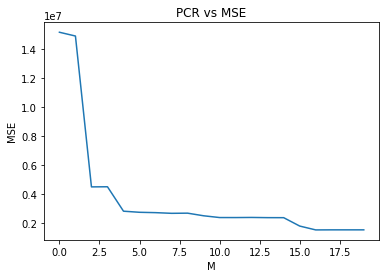

In [6]:
pca = PCA()
X_train_reduced = pca.fit_transform(scale(X_train))

regr = LinearRegression()
mse = []

score = -1*model_selection.cross_val_score(regr, 
                                           np.ones((len(X_train_reduced),1)), y_train, cv=5,
                                          scoring = "neg_mean_squared_error").mean()
mse.append(score)

for i in np.arange(1,20):
    score = -1*model_selection.cross_val_score(regr, X_train_reduced[:,:i], y_train,cv=5, scoring = "neg_mean_squared_error").mean()
    mse.append(score)

    
M_pcr = np.argmin(mse)
print("Lowest MSE is ", min(mse), "at M =", M_pcr)
plt.plot(mse)
plt.xlabel("M")
plt.ylabel("MSE")
plt.title("PCR vs MSE")

In [7]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=M_pcr), LinearRegression())
pcr.fit(X_train, y_train)

y_predict_pcr = pcr.predict(X_test)

print("Test Error with M =", M_pcr, "is", mean_squared_error(y_test, y_predict_pcr))

Test Error with M = 16 is 757322.7052124927


(f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value
of M selected by cross-validation.

Lowest MSE is  1544327.8744321384 at M = 17


Text(0.5, 1.0, 'PLS M vs MSE')

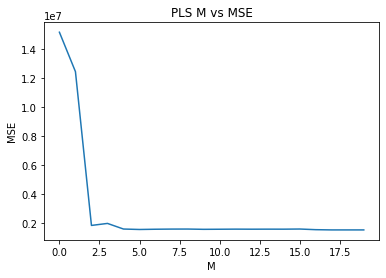

In [8]:
pls = PLSRegression()
#scaling was not working in this method!
regr = LinearRegression()
mse = []

score = -1*model_selection.cross_val_score(regr, np.ones((len(X_train),1)), y_train, cv=5,
                                          scoring = "neg_mean_squared_error").mean()
mse.append(score)

for i in np.arange(1,20):
    score = -1*model_selection.cross_val_score(regr, X_train.iloc[:,:i], y_train, cv=5, scoring = "neg_mean_squared_error").mean()
    mse.append(score)
    
M_pls = np.argmin(mse)
print("Lowest MSE is ", min(mse), "at M =", M_pls)
plt.plot(mse)
plt.xlabel("M")
plt.ylabel("MSE")
plt.title("PLS M vs MSE")

In [9]:
pls = PLSRegression(n_components=M_pls)

pls.fit(X_train, y_train)

y_predict_pls = pls.predict(X_test)
print("Test Error with M =", M_pls, "is", mean_squared_error(y_test, y_predict_pls))

Test Error with M = 17 is 640045.0279061527


(g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

In [10]:
print("OLS MSE:", mean_squared_error(y_test, y_predict_lm))
print("PCR MSE:", mean_squared_error(y_test, y_predict_pcr))
print("PLS MSE:", mean_squared_error(y_test, y_predict_pls))
print("\n")
print("OLS R2:", r2_score(y_test, y_predict_lm))
print("PCR R2:", r2_score(y_test, y_predict_pcr))
print("PLS R2:", r2_score(y_test, y_predict_pls))

OLS MSE: 640045.0279061531
PCR MSE: 757322.7052124927
PLS MSE: 640045.0279061527


OLS R2: 0.9549935938442623
PCR R2: 0.9467469134581683
PLS R2: 0.9549935938442623


Based on MSE and R2, the linear model and PLS performs best, followed by PCR. There is no difference between OLS and PLS in this case, and PCR is only marginally less accurate. The R2 reveals that all three methods explained about 95% of variation in applications.

4. This question relates to the plots in Figure 8.12.
(a) Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure 8.12. The numbers inside the boxes indicate the mean of Y within each region

(b) Create a diagram similar to the left-hand panel of Figure 8.12, using the tree illustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

Question 9

i. Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations

Note that purchase = 0 indicates Citrus Hill and purchase = 1 indicates Minute Maid

In [11]:
oj = pd.read_csv("oj.csv", index_col = 0)
oj["Store7"] = pd.get_dummies(oj["Store7"])["Yes"]
oj["Purchase"] = pd.get_dummies(oj["Purchase"])["MM"]
oj

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,0,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
2,0,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
3,0,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
4,1,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
5,0,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,1,0.000000,0.053763,0.23,0
1067,0,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,1,0.000000,0.000000,0.32,0
1068,1,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,1,0.000000,0.000000,0.32,0
1069,0,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,1,0.112676,0.000000,0.27,0


In [12]:
X=oj.drop(["Purchase"], axis=1)
y=oj["Purchase"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.252, random_state = 1)

ii. Fit a tree to the training data, with Purchase as the response and the other variables as predictors. What is the training error rate? (Set the max_depth parameter to 3 in order to get an interpretable plot)

In [13]:
tree_model = DecisionTreeClassifier(max_depth =3, random_state=1)
tree_model.fit(X_train, y_train)

y_predict_tree_train = tree_model.predict(X_train)

mean_squared_error(y_train, y_predict_tree_train)

0.1525

iii. Create a plot of the tree. How many terminal nodes does the tree have? Pick one of the terminal nodes, and interpret the information displayed.

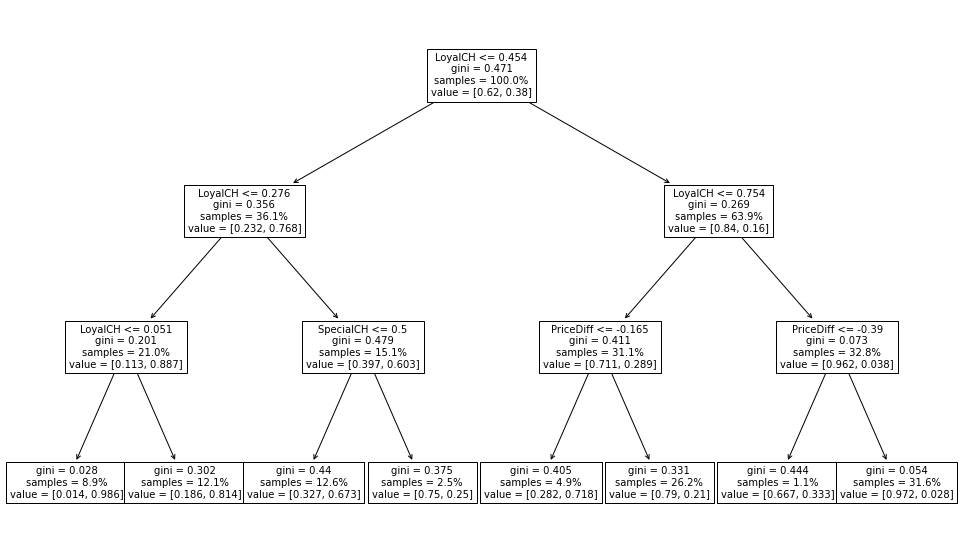

In [14]:
plt.figure(figsize=(17,10))
tree.plot_tree(tree_model, fontsize=10, proportion = True, feature_names = X_train.columns)

plt.show()

The tree has 8 terminal nodes. The leftmost terminal node contains 71 observations (8.9% of the observations). It was generated by the following sequences of decisions, all of them based on the LoyalCH predictor:

- LoyalCH <= 0.454
- LoyalCH <= 0.276
- LoyalCH <= 0.051

These observations have a GINI index of 0.028, so they are relatively homogeneous.

This group has a 1.4% probability of purchasing Citrus Hill orange juice and a 98.6% probability of buying Minute Maid orange juice. This makes sense because LoyalCH is brand loyalty to Citrus Hill orange juice. It makes intuitive sense that consumers who have little brand loyalty to Citrus Hill would be the least likely to buy it, and the most likely to buy the competing brand.

iv. Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [16]:
y_predict_tree_test = tree_model.predict(X_test)

In [17]:
test_cm = confusion_matrix(y_test, y_predict_tree_test)

print(test_cm)

print('\nTrue Negatives: ', test_cm[0][0])
print('False Negatives: ', test_cm[1][0])
print('True Positives: ', test_cm[1][1])
print('False Positives: ', test_cm[0][1])

print('\nTest error rate: ', 1 - accuracy_score(y_test, y_predict_tree_test))

[[139  18]
 [ 31  82]]

True Negatives:  139
False Negatives:  31
True Positives:  82
False Positives:  18

Test error rate:  0.18148148148148147


v. Determine the optimal tree size by tuning the ccp_alpha argument in scikit-learn’s DecisionTreeClassifier.1 You can use GridSearchCV for this purpose.

In [18]:
tree_size = np.arange(2,20)
print(tree_size)
parameters = {"max_depth": tree_size}
cv_tree = GridSearchCV(tree_model,parameters)
cv_tree.fit(X_train, y_train)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

vi. Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis calculated using the method in the previous question. Which tree size corresponds to the lowest cross-validated classification error rate?

Text(0.5, 0, 'Tree size')

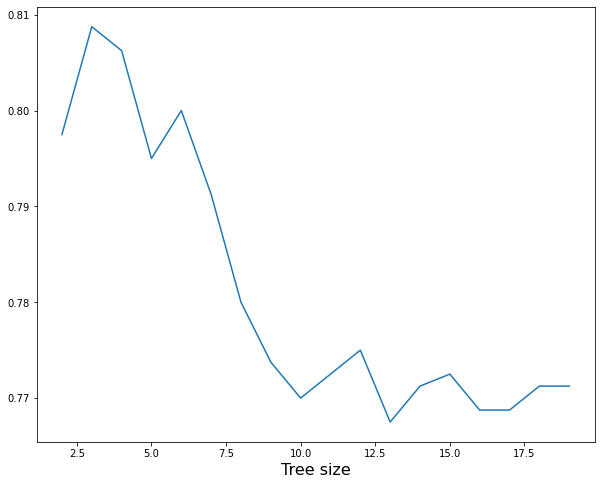

In [19]:
cv_scores = list(cv_tree.cv_results_["mean_test_score"])

plt.figure(figsize=(10,8))
sns.lineplot(x=tree_size, y=cv_scores)
plt.xlabel("Tree size", fontsize= 16)

vii. Produce a pruned tree corresponding to the optimal tree size obtained using crossvalidation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

In [20]:
optimal_tree_size = tree_size[cv_scores.index(max(cv_scores))]

In [21]:
optimal_tree_model = DecisionTreeClassifier(max_depth = optimal_tree_size, random_state=1) #Random state (Pseudo-random number) in Scikit learn
optimal_tree_model.fit(X_train, y_train)

y_predict_optimal_tree_train = optimal_tree_model.predict(X_train)
mean_squared_error(y_train, y_predict_optimal_tree_train)

0.1525

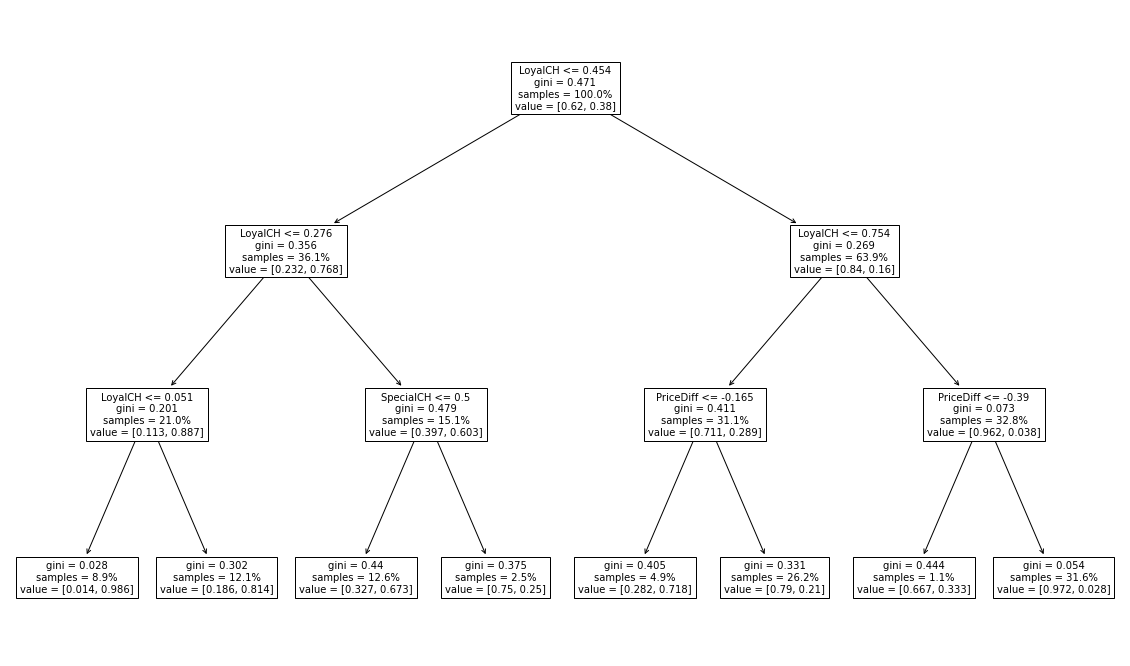

In [22]:
plt.figure(figsize=(20,12))
tree.plot_tree(optimal_tree_model, fontsize=10, proportion = True, feature_names = X_train.columns)

plt.show()

viii. Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [23]:
unpruned_tree_model = DecisionTreeClassifier(random_state=1)
unpruned_tree_model.fit(X_train, y_train)

y_predict_unpruned_tree_train = unpruned_tree_model.predict(X_train)

In [24]:
print("The training error of the unpruned tree is:", mean_squared_error(y_train, y_predict_unpruned_tree_train))
print("The training error of the pruned tree is:", mean_squared_error(y_train, y_predict_optimal_tree_train))

The training error of the unpruned tree is: 0.01
The training error of the pruned tree is: 0.1525


The training error rate of the pruned tree is higher.

ix. Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [25]:
y_predict_optimal_tree_test = optimal_tree_model.predict(X_test)

y_predict_unpruned_tree_test = unpruned_tree_model.predict(X_test)

print("The test error of the unpruned tree is:", mean_squared_error(y_test, y_predict_unpruned_tree_test))
print("The test error of the pruned tree is:", mean_squared_error(y_test, y_predict_optimal_tree_test))

The test error of the unpruned tree is: 0.24444444444444444
The test error of the pruned tree is: 0.1814814814814815


The test error of the unpruned tree is 6 percentage points higher than the pruned tree. So the optimal tree is a better fit for the test data. One possible explanation for this is that the unpruned tree was overfit to the training set, so it performed poorly on the test data.